In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
col = sns.hls_palette(10)
plt.style.use('seaborn')
from collections import defaultdict, Counter
import pandas as pd
from IPython.display import display
import os
from pprint import pprint

directory = os.path.normpath("C:\\Users\\akira\\Documents\\GitHub\\COMP30024\\Chexers\\Part B\\code\\Chexers\\logs")

blue_maxn_22.txt empty file. game quit unexpectedly (usually a keyboard interrupt)
blue_maxn_23.txt empty file. game quit unexpectedly (usually a keyboard interrupt)
blue_maxn_24.txt empty file. game quit unexpectedly (usually a keyboard interrupt)
blue_maxn_25.txt empty file. game quit unexpectedly (usually a keyboard interrupt)
blue_maxn_26.txt empty file. game quit unexpectedly (usually a keyboard interrupt)
blue_maxn_27.txt empty file. game quit unexpectedly (usually a keyboard interrupt)
blue_maxn_28.txt empty file. game quit unexpectedly (usually a keyboard interrupt)
blue_maxn_29.txt empty file. game quit unexpectedly (usually a keyboard interrupt)
blue_maxn_30.txt empty file. game quit unexpectedly (usually a keyboard interrupt)
blue_maxn_31.txt empty file. game quit unexpectedly (usually a keyboard interrupt)
blue_maxn_32.txt empty file. game quit unexpectedly (usually a keyboard interrupt)
blue_maxn_33.txt empty file. game quit unexpectedly (usually a keyboard interrupt)
blue

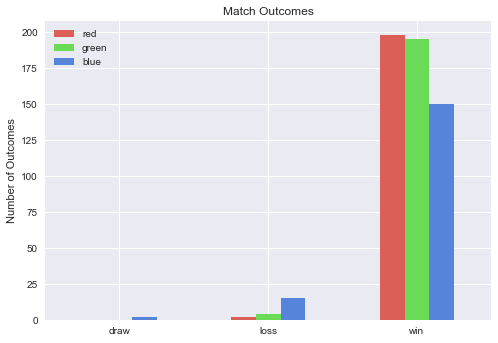

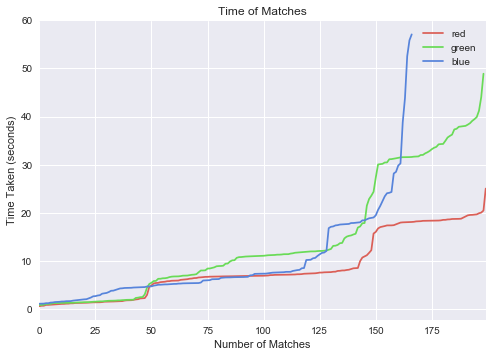

AGENT DRAW RATE
Counter({'maxn': 1, 'paranoid': 1})

AGENT LOSS RATE
Counter({'paranoid': 10, 'greedy': 9, 'maxn': 2})

GAME LOST AS COLOUR
{'blue': [1, 14, 21, 22, 24, 27, 45, 2, 20, 20, 37, 4, 43, 47, 48],
 'green': [1, 10, 25, 30],
 'red': [14, 31]}

AGENT OVER 60 SECOND MATCHES
Counter()

GAME OVERTIME AS COLOUR
{'blue': [], 'green': [], 'red': []}


In [5]:
count = {'red': defaultdict(int), 'green': defaultdict(int), 'blue': defaultdict(int)}
losses = {'red': list(), 'green': list(), 'blue': list()}
loss_number = {'red': list(), 'green': list(), 'blue': list()}
draws = {'red': list(), 'green': list(), 'blue': list()}
time = {'red': list(), 'green': list(), 'blue': list()}
overtime = {'red': list(), 'green': list(), 'blue': list()}
overtime_number = {'red': list(), 'green': list(), 'blue': list()}
won = 0
total = 0

for directory, subdirectories, files in os.walk('.'):
    if len(files) < 20:
        continue
    try:
        colour = files[0].split('_')[0]
    except:
        continue
    for file in files:
        agent = file.split('_')[1]
        game_number = int(file.split('_')[2][:-4])
        try:
            f = pd.read_csv(os.path.join(directory, file),sep='\n')
        except:
            print(file,"empty file. game quit unexpectedly (usually a keyboard interrupt)")
            continue
        try:
            match_time = float(''.join(list(f.columns[0])[6:]))
        except:
            print(f"INVALID ACTION {file} !!!!")
            continue
        total += 1
        time[colour].append(match_time)
        if match_time >= 60:
            overtime[colour].append(agent)
            overtime_number[colour].append(game_number)
        if 'game state occurred 4 times' in ''.join(f.values[0][0]):
            draws[colour].append(agent)
            count[colour]['draw'] += 1
        elif colour in f.values[0][0].casefold():
            count[colour]['win'] += 1
            won += 1
        else:
            losses[colour].append(agent)
            count[colour]['loss'] += 1
            loss_number[colour].append(game_number)
            
print(f"\n\nWIN RATE: {100*won/total}%")
            
pd.DataFrame().from_dict(count).plot.bar(color=[col[0],col[3],col[6]])
plt.title("Match Outcomes")
plt.ylabel("Number of Outcomes")
plt.xticks(rotation=0)
plt.show()

# sort time for a nice graph :)
for i in time.keys():
    time[i].sort()
    
pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in time.items() ])).plot(color=[col[0],col[3],col[6]])
plt.title("Time of Matches")
plt.ylabel("Time Taken (seconds)")
plt.xlabel("Number of Matches")
plt.xticks(rotation=0)
plt.show()

print("AGENT DRAW RATE")
pprint(Counter([b for a in draws.values() for b in a]))
print("\nAGENT LOSS RATE")
pprint(Counter([b for a in losses.values() for b in a]))
print("\nGAME LOST AS COLOUR")
pprint(loss_number)
print("\nAGENT OVER 60 SECOND MATCHES")
pprint(Counter([b for a in overtime.values() for b in a]))
print("\nGAME OVERTIME AS COLOUR")
pprint(overtime_number)

match_1.txt empty file. game quit unexpectedly (usually opponent disconnect)
match_10.txt empty file. game quit unexpectedly (usually opponent disconnect)
match_11.txt empty file. game quit unexpectedly (usually opponent disconnect)
match_15.txt empty file. game quit unexpectedly (usually opponent disconnect)
match_2.txt empty file. game quit unexpectedly (usually opponent disconnect)
match_8.txt empty file. game quit unexpectedly (usually opponent disconnect)
match_9.txt empty file. game quit unexpectedly (usually opponent disconnect)


WIN RATE: 25.0%


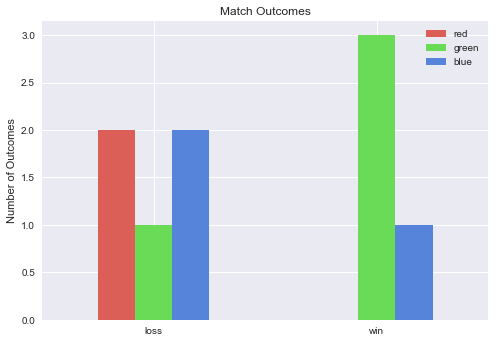

AGENT DRAW RATE
Counter()

AGENT LOSS RATE
Counter({'0.txt': 5})

GAME LOST AS COLOUR
{'blue': ['4', '6'], 'green': ['7'], 'red': ['12', '13']}

AGENT OVER 60 SECOND MATCHES
Counter()

GAME OVERTIME AS COLOUR
{'blue': [], 'green': [], 'red': []}


In [65]:
count = {'red': defaultdict(int), 'green': defaultdict(int), 'blue': defaultdict(int)}
losses = {'red': list(), 'green': list(), 'blue': list()}
loss_number = {'red': list(), 'green': list(), 'blue': list()}
draws = {'red': list(), 'green': list(), 'blue': list()}
won = 0
total = 0

for directory, subdirectories, files in os.walk('.'):
    if len(files) <= 10 or len(files) > 25:
        continue
    for file in files:
        game_number = ''.join([i for i in file if i.isdigit()])
        f = pd.read_csv(os.path.join(directory, file),sep='\n')
        colour = ''.join(list(f.columns[0])[12:])
        total += 1
        try:
            if colour in list(f.values)[1][0].casefold():
                count[colour]['win'] += 1
                won += 1
            else:
                losses[colour].append(agent)
                count[colour]['loss'] += 1
                loss_number[colour].append(game_number)
        except:
            print(file,"empty file. game quit unexpectedly (usually opponent disconnect)")
            continue
            
print(f"\n\nWIN RATE: {100*won/total}%")
            
pd.DataFrame().from_dict(count).plot.bar(color=[col[0],col[3],col[6]])
plt.title("Match Outcomes")
plt.ylabel("Number of Outcomes")
plt.xticks(rotation=0)
plt.show()

print("AGENT DRAW RATE")
pprint(Counter([b for a in draws.values() for b in a]))
print("\nAGENT LOSS RATE")
pprint(Counter([b for a in losses.values() for b in a]))
print("\nGAME LOST AS COLOUR")
pprint(loss_number)
print("\nAGENT OVER 60 SECOND MATCHES")
pprint(Counter([b for a in overtime.values() for b in a]))
print("\nGAME OVERTIME AS COLOUR")
pprint(overtime_number)